In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew  # Import skew function from scipy.stats
import seaborn as sns
#to ignore warnings
import warnings

In [2]:
#data import
data = pd.read_csv("/content/drive/MyDrive/pharmacy (1).csv")

In [3]:

data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
data.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
data.nunique()

,0
Age,57
Sex,2
BP,3
Cholesterol,2
Na_to_K,198
Drug,5


In [7]:
data.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [8]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [9]:
data.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,drugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [10]:

categorical_feature_columns = list(set(data.columns) - set(data._get_numeric_data().columns))
categorical_feature_columns

['Cholesterol', 'Drug', 'Sex', 'BP']

In [11]:
numerical_feature_columns = list(data._get_numeric_data().columns)
numerical_feature_columns

['Age', 'Na_to_K']

In [12]:

cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Sex', 'BP', 'Cholesterol', 'Drug'], dtype='object')
Numerical Variables:
['Age', 'Na_to_K']


In [13]:
# Categorical Variables Analysis
for col in cat_cols:
    print(f"Value counts for {col}:")
    print(data[col].value_counts())
    print()

print("Summary of Categorical Variables:")
print(data[cat_cols].describe())
print()


Value counts for Sex:
Sex
M    104
F     96
Name: count, dtype: int64

Value counts for BP:
BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

Value counts for Cholesterol:
Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

Value counts for Drug:
Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

Summary of Categorical Variables:
        Sex    BP Cholesterol   Drug
count   200   200         200    200
unique    2     3           2      5
top       M  HIGH        HIGH  drugY
freq    104    77         103     91



In [14]:
# Numerical Variables Analysis

num_summary = data[num_cols].describe().transpose()
num_summary['skewness'] = data[num_cols].apply(lambda x: skew(x))
print("Summary of Numerical Variables:")
print(num_summary)
print()


Summary of Numerical Variables:
         count       mean        std     min      25%      50%    75%     max  \
Age      200.0  44.315000  16.544315  15.000  31.0000  45.0000  58.00  74.000   
Na_to_K  200.0  16.084485   7.223956   6.269  10.4455  13.9365  19.38  38.247   

         skewness  
Age      0.030081  
Na_to_K  1.031530  



Age
Skew : 0.03


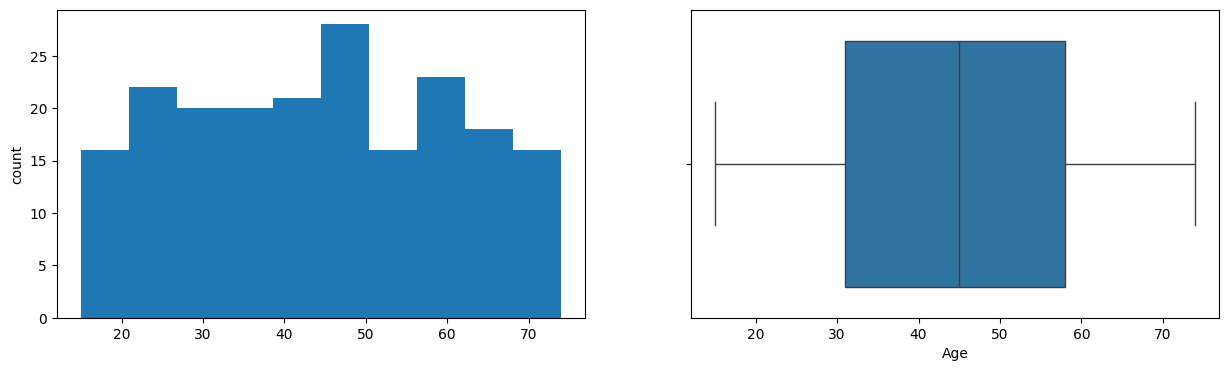

Na_to_K
Skew : 1.04


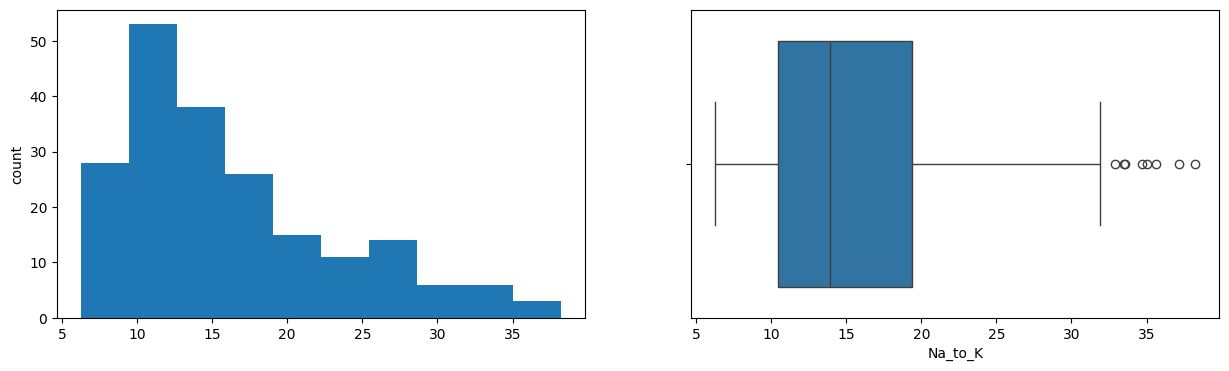

In [15]:
# DistPlot for Numerical Variables
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

<ipython-input-16-4731490ab11d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'],bins=50,color='r',ax=ax)
<ipython-input-16-4731490ab11d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(data['Age']),bins=40,color='b',ax=ax)


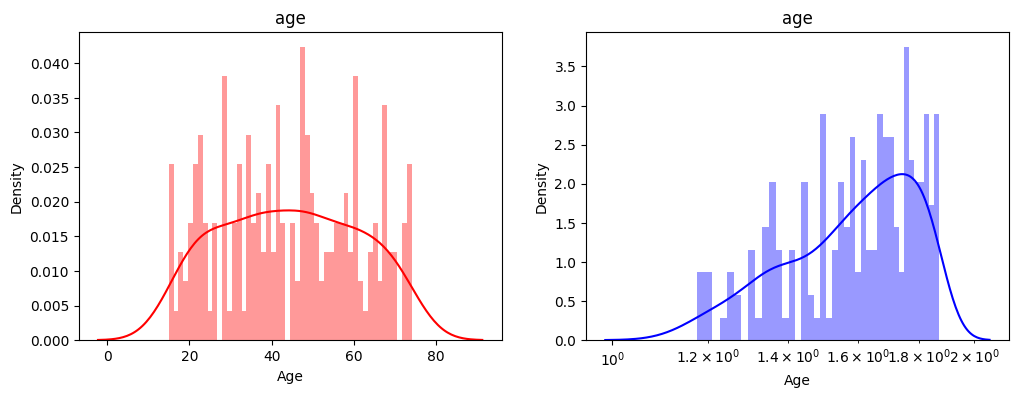

In [16]:

f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(data['Age'],bins=50,color='r',ax=ax)
ax.set_title('age')

ax=f.add_subplot(122)
sns.distplot(np.log10(data['Age']),bins=40,color='b',ax=ax)
ax.set_title('age')
ax.set_xscale('log');

In [17]:
cat_vars = data.select_dtypes(include=['object']).columns
for col in cat_vars:
    print(f"Value counts for {col}:")
    print(data[col].value_counts())
    print()
    print("Summary of Categorical Variables:")
print(data[cat_vars].describe())
print()


Value counts for Sex:
Sex
M    104
F     96
Name: count, dtype: int64

Summary of Categorical Variables:
Value counts for BP:
BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

Summary of Categorical Variables:
Value counts for Cholesterol:
Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

Summary of Categorical Variables:
Value counts for Drug:
Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

Summary of Categorical Variables:
        Sex    BP Cholesterol   Drug
count   200   200         200    200
unique    2     3           2      5
top       M  HIGH        HIGH  drugY
freq    104    77         103     91



In [18]:

num_vars = data.select_dtypes(include=['int64', 'float64']).columns
num_summary = data[num_vars].describe().transpose()
num_summary['skewness'] = data[num_vars].apply(lambda x: skew(x))
print("Summary of Numerical Variables:")
print(num_summary)
print()


Summary of Numerical Variables:
         count       mean        std     min      25%      50%    75%     max  \
Age      200.0  44.315000  16.544315  15.000  31.0000  45.0000  58.00  74.000   
Na_to_K  200.0  16.084485   7.223956   6.269  10.4455  13.9365  19.38  38.247   

         skewness  
Age      0.030081  
Na_to_K  1.031530  



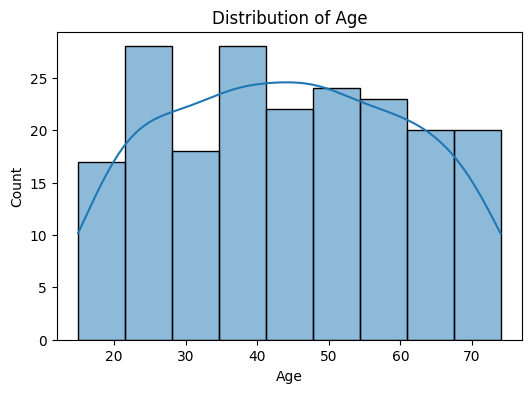

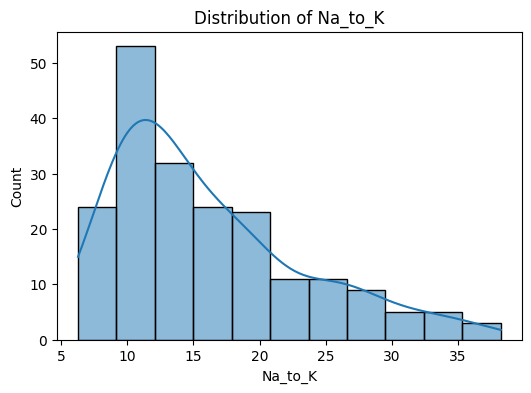

In [19]:
# Drug Type Distribution
for col in num_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


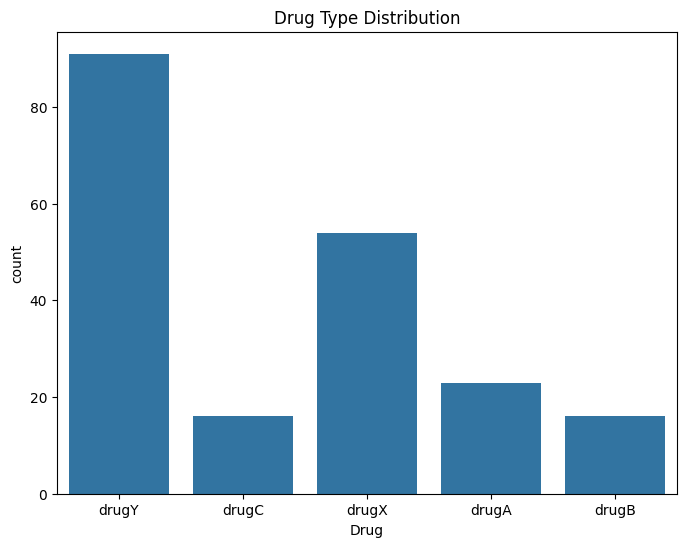

In [20]:
#  Gender Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Drug', data=data)
plt.title('Drug Type Distribution')
plt.show()


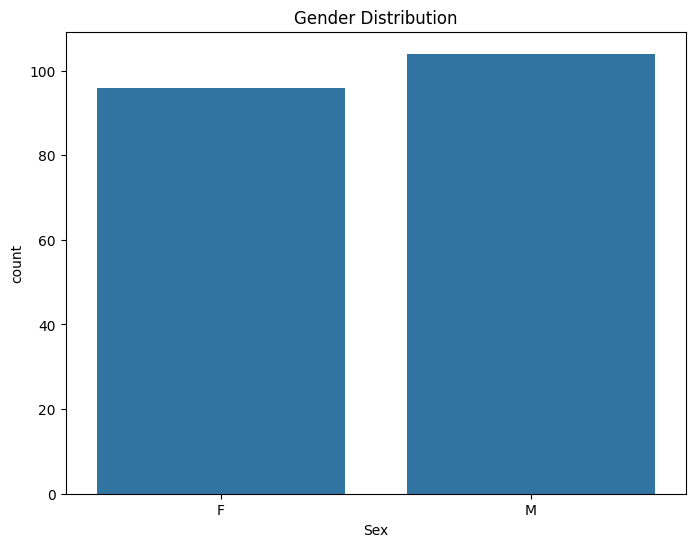

In [21]:
# Blood Pressure Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', data=data)
plt.title('Gender Distribution')
plt.show()

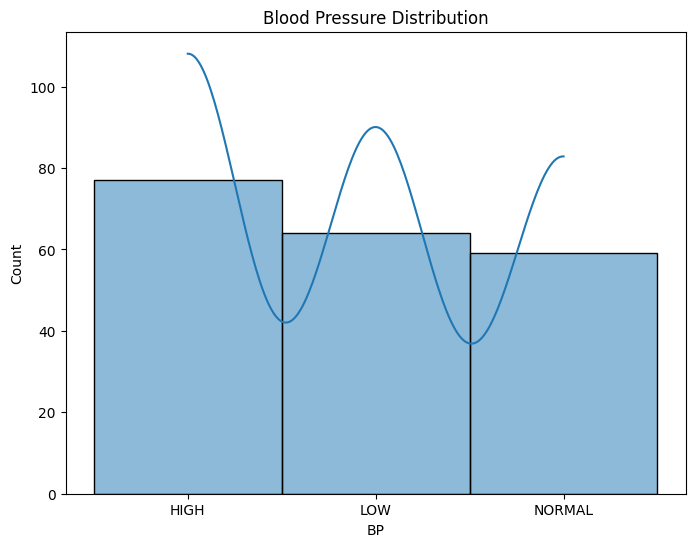

In [22]:
#  Blood Pressure Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['BP'], kde=True)
plt.title('Blood Pressure Distribution')
plt.show()

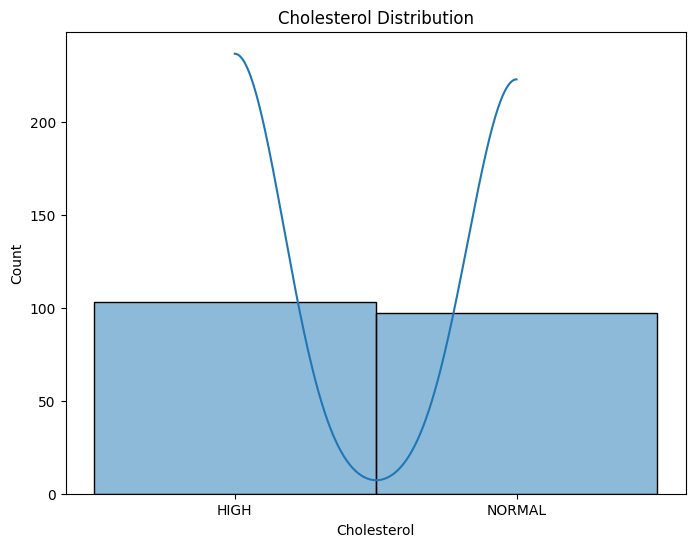

In [23]:
#cholestral distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Cholesterol'], kde=True)
plt.title('Cholesterol Distribution')
plt.show()

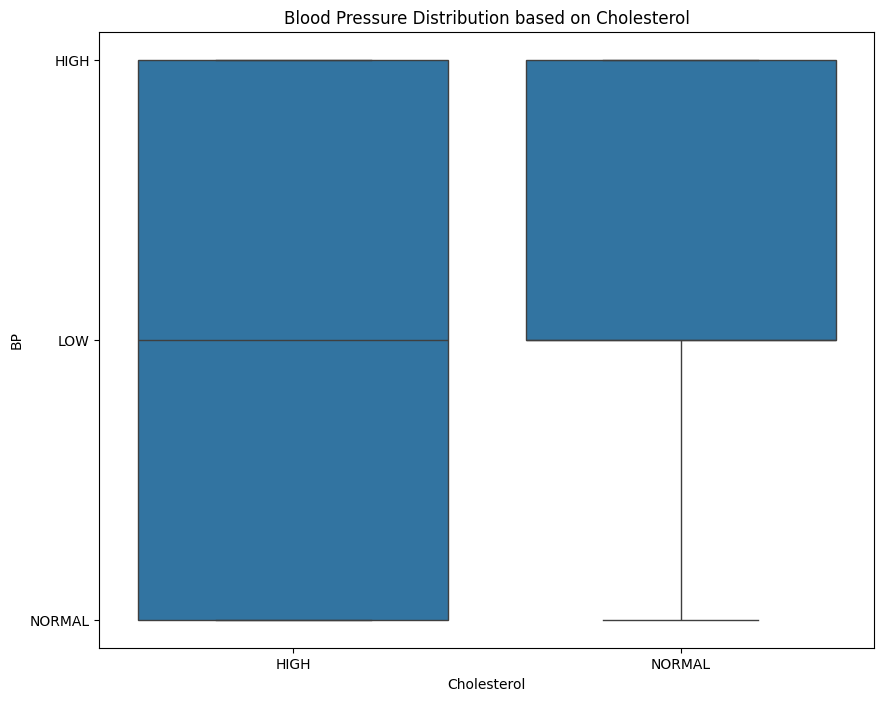

In [24]:
# Blood Pressure Distribution based on Cholesterol
plt.figure(figsize=(10, 8))
sns.boxplot(x='Cholesterol', y='BP', data=data)
plt.title('Blood Pressure Distribution based on Cholesterol')
plt.show()

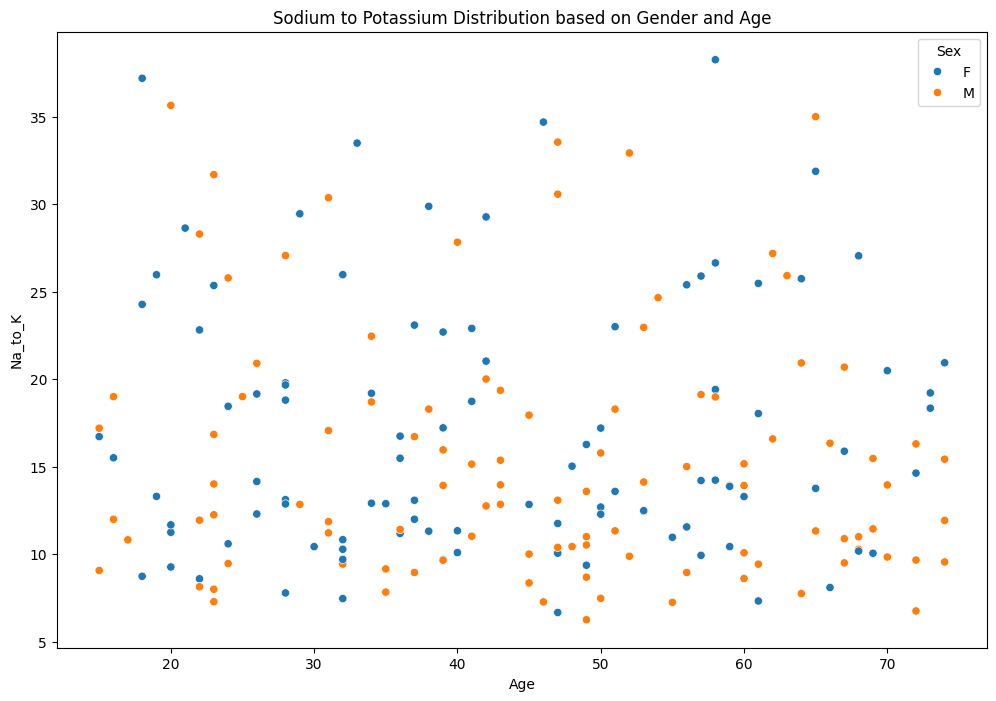

In [25]:
# Sodium to Potassium Distribution based on Gender and Age
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='Na_to_K', hue='Sex', data=data)
plt.title('Sodium to Potassium Distribution based on Gender and Age')
plt.show()

In [26]:
# Binning for Age
bins_age = [0, 20, 30, 40, 50, 60, 70, np.inf]
labels_age = ['Below 20', '20 - 29', '30 - 39', '40 - 49', '50 - 59', '60 - 69', 'Above 70']
data['Age_Category'] = pd.cut(data['Age'], bins=bins_age, labels=labels_age, right=False)


In [27]:
# Binning for Na_to_K
bins_na_k = [0, 10, 20, 30, np.inf]
labels_na_k = ['Below 10', '10 - 20', '20 - 30', 'Above 30']
data['Na_to_K_Category'] = pd.cut(data['Na_to_K'], bins=bins_na_k, labels=labels_na_k, right=False)


In [28]:
print("Modified Dataset after Data Binning:")
print(data.head())
print()


Modified Dataset after Data Binning:
   Age Sex      BP Cholesterol  Na_to_K   Drug Age_Category Na_to_K_Category
0   23   F    HIGH        HIGH   25.355  drugY      20 - 29          20 - 30
1   47   M     LOW        HIGH   13.093  drugC      40 - 49          10 - 20
2   47   M     LOW        HIGH   10.114  drugC      40 - 49          10 - 20
3   28   F  NORMAL        HIGH    7.798  drugX      20 - 29         Below 10
4   61   F     LOW        HIGH   18.043  drugY      60 - 69          10 - 20



In [29]:
#  Dataset Splitting
from sklearn.model_selection import train_test_split

X = data.drop(['Drug'], axis=1)  # Features
y = data['Drug']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [30]:
#  Preprocessing-one Hot Encoding for categorical variables
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)


In [31]:
print("Encoded Training Dataset:")
print(X_train_encoded.head())
print()

Encoded Training Dataset:
     Age  Na_to_K  Sex_F  Sex_M  BP_HIGH  BP_LOW  BP_NORMAL  Cholesterol_HIGH  \
169   20   11.262   True  False     True   False      False              True   
97    56   25.395   True  False     True   False      False              True   
31    74    9.567  False   True     True   False      False              True   
12    43   15.376  False   True    False    True      False              True   
35    46    7.285  False   True    False   False       True             False   

     Cholesterol_NORMAL  Age_Category_Below 20  Age_Category_20 - 29  \
169               False                  False                  True   
97                False                  False                 False   
31                False                  False                 False   
12                False                  False                 False   
35                 True                  False                 False   

     Age_Category_30 - 39  Age_Category_40 - 49  Age_C

In [32]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_encoded, y_train)


In [33]:
print("Class Distribution after SMOTE:")
print(y_train_resampled.value_counts())

Class Distribution after SMOTE:
Drug
drugA    65
drugY    65
drugB    65
drugX    65
drugC    65
Name: count, dtype: int64
